In [1]:
#importing all the required libraries

import numpy as np    #for making arrays
import pandas as pd   #load data 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    #allows to split data into training and testing data
from sklearn.linear_model import LogisticRegression     #using logistic as its a binary classification
from sklearn.metrics import accuracy_score

In [2]:
#extracting the data to a dataframe

data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It has time of transactions(time is in seconds,elapsed time from first transaction), 28 transaction details (these are converted ones into numbers by pca),amount in dolllars,class legit/fradulent

In [4]:
data.shape

(284807, 31)

In [5]:
data.info()   #gives dtype ,null values,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum().sum()

0

In [7]:
# distribution of legit transactions & fraudulent transactions
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

data is highly unbalanced in ratio 577:1,we cannot train our model with this as here more datapoints are of legit ,so it will hover our results and will be orientted towards legit transactions side

In [8]:
# separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [9]:
print(legit.shape)

(284315, 31)


In [10]:
print(fraud.shape)

(492, 31)


# Visualizations

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

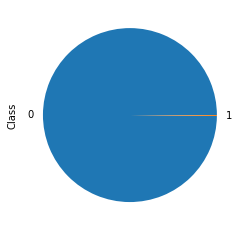

In [11]:
# Checking the class distribution of the target variable in percentage
print((data.groupby('Class')['Class'].count()/data['Class'].count()) *100)
((data.groupby('Class')['Class'].count()/data['Class'].count()) *100).plot.pie()

In [12]:
# Checking the correlation
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


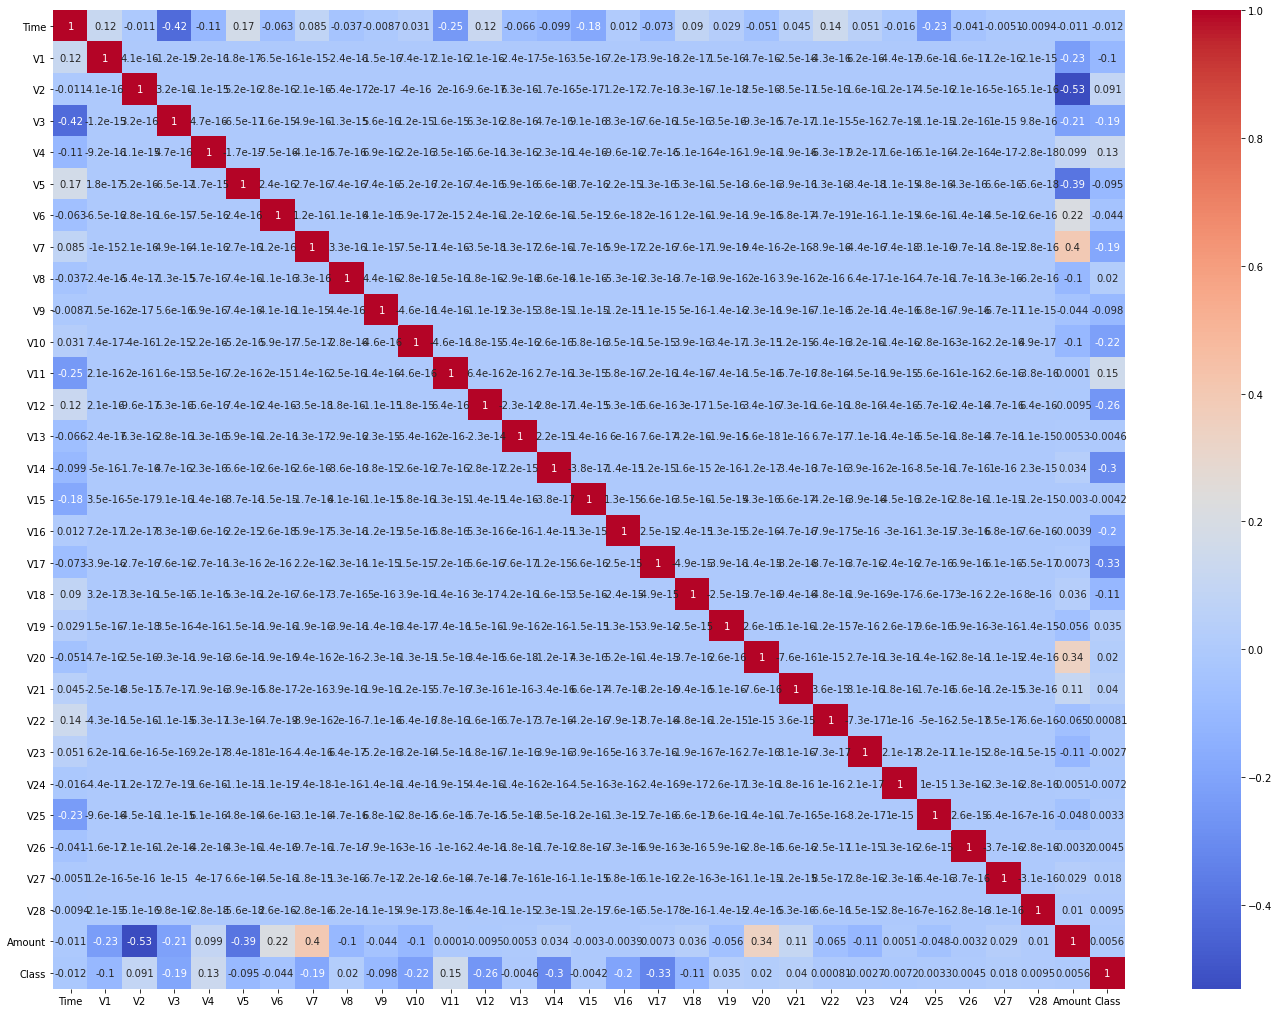

In [13]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


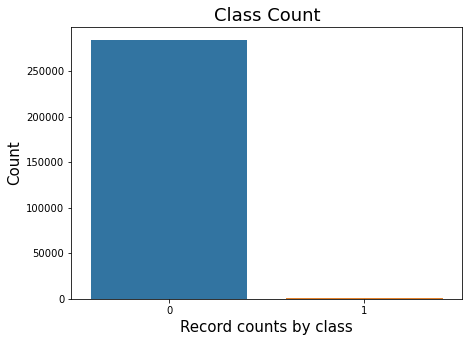

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(data['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [15]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

here when we see the both transactional values we see mean amount of fraud is relatively higher 

In [17]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


here we see the mean of all the fraud columns is quite higher than legit ,which becomes the differentiating factor

# Dealing with imbalanced data

# Using Undersampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

we have 492 fradulent transactions , lets under sample the legit transactions to 492 and club them

which makes the distribution uniform and give good predictions

We are undersampling the data because our data is highly unbalanced. The number of transactions which are not fradulent are labeled as 0 and the trancactions whoch are fradulent are labeled as 1.

The number of non fraudulent transactions are 284315 and the number of fradulent transactions are 492.

If we oversample our data so inclusion of almost 284000 dummy elements will surely affect our outcome by a huge margin and it will be hugely biased as non-fradulant so undersampling is a much better approach to get an optimal and desired outcome.

In [18]:
legit_sample = legit.sample(n=492)  #randomly take 492 samples

In [19]:
#lets join two samples and get the new dataset
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [20]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1754,1356.0,-0.708659,1.360573,0.704554,-0.103319,0.069847,-0.728133,0.723974,0.171746,-0.845246,...,-0.340823,-1.181941,0.202594,-0.142191,-0.684229,-0.221155,-0.139790,0.083403,26.59,0
254525,156770.0,-1.369735,0.169079,2.100394,0.650969,-0.137730,1.151016,-0.334742,0.595423,0.521047,...,0.159133,0.611418,-0.382389,-1.142495,0.563674,-0.206451,0.481547,0.277354,100.00,0
119852,75608.0,-4.036555,-9.274734,-1.581115,2.572595,-3.927800,1.957864,2.058934,-0.112464,-0.791285,...,1.605066,-0.961298,-2.283519,-0.220957,-0.951770,-0.475511,-0.383484,0.495075,2687.00,0
173442,121483.0,2.067920,0.114627,-1.879471,0.184825,0.731737,-0.273468,0.087445,-0.071793,0.231433,...,-0.342518,-0.901486,0.265245,0.003123,-0.215146,0.183539,-0.065442,-0.045167,0.99,0
220712,142276.0,-1.183456,0.577975,0.862951,-1.438795,0.842183,-0.590090,1.392518,-0.042342,0.161563,...,-0.227451,-0.867632,-0.290063,0.584943,0.890492,-0.596365,-0.172899,0.073473,69.90,0


In [21]:
new_dataset['Class'].value_counts()  #now the data is uniform

0    492
1    492
Name: Class, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()#mean  is also almost same ,so the features are same, the sample is good as mean didnot vary

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92294.953252,0.141908,-0.029986,0.003402,0.113631,-0.069800,-0.040792,-0.006790,0.020826,-0.037711,...,0.018727,0.033635,-0.059644,-0.026383,-0.009304,0.016395,-0.007266,0.006800,-0.001261,91.773801
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the data into Features & Targets

In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [24]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
1754      1356.0 -0.708659  1.360573  0.704554 -0.103319  0.069847 -0.728133   
254525  156770.0 -1.369735  0.169079  2.100394  0.650969 -0.137730  1.151016   
119852   75608.0 -4.036555 -9.274734 -1.581115  2.572595 -3.927800  1.957864   
173442  121483.0  2.067920  0.114627 -1.879471  0.184825  0.731737 -0.273468   
220712  142276.0 -1.183456  0.577975  0.862951 -1.438795  0.842183 -0.590090   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='Amount'>

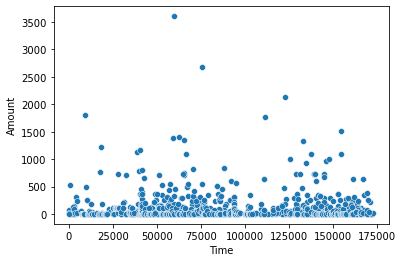

In [25]:
sns.scatterplot(X.Time,X.Amount)

In [26]:
print(Y)

1754      0
254525    0
119852    0
173442    0
220712    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [27]:
cols = list(X.columns.values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


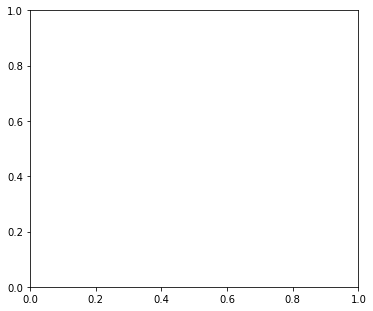

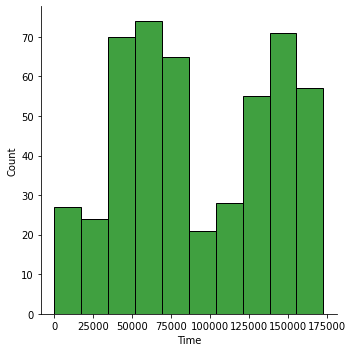

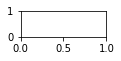

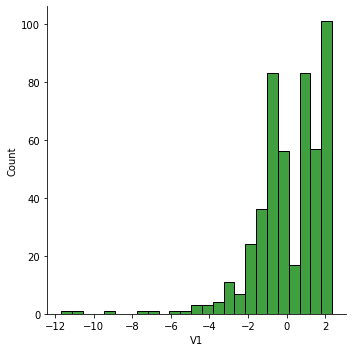

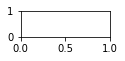

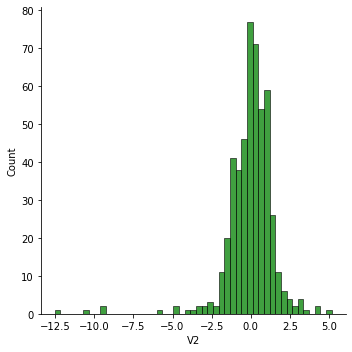

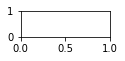

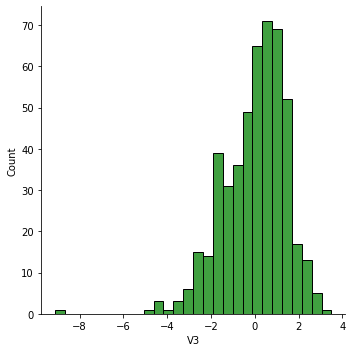

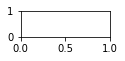

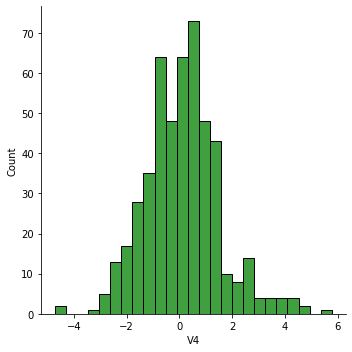

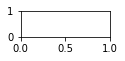

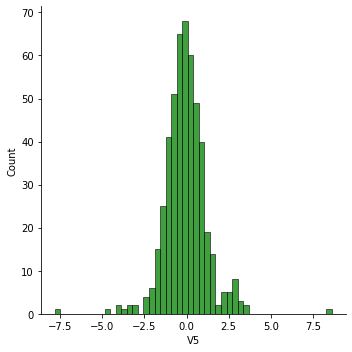

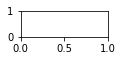

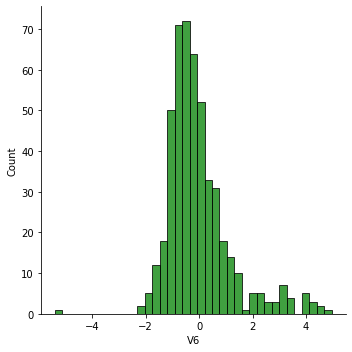

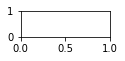

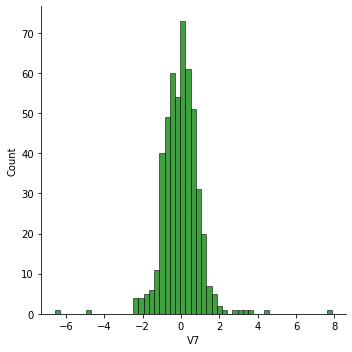

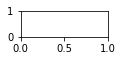

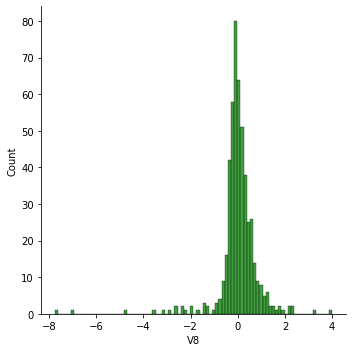

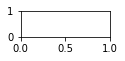

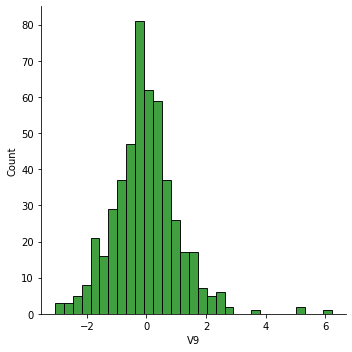

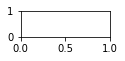

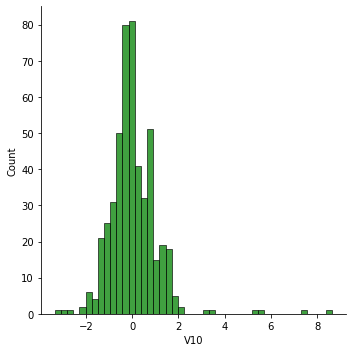

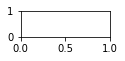

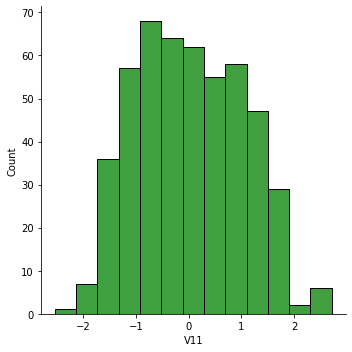

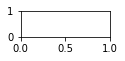

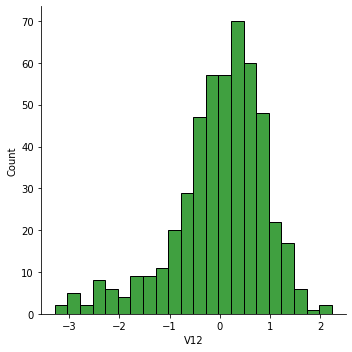

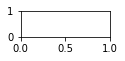

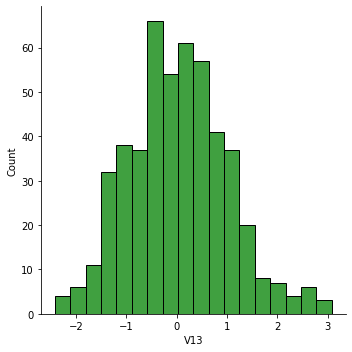

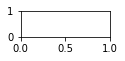

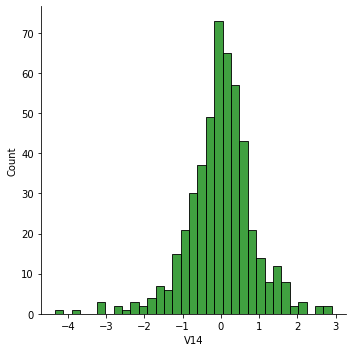

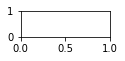

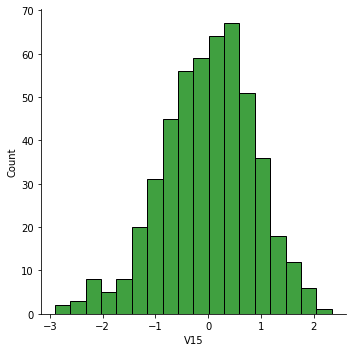

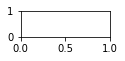

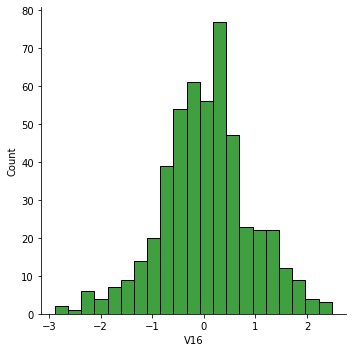

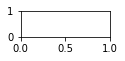

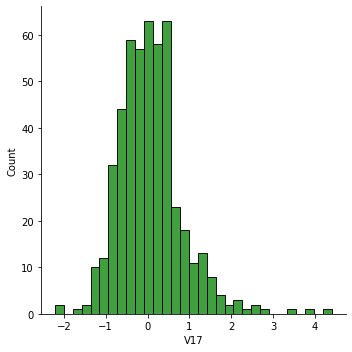

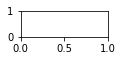

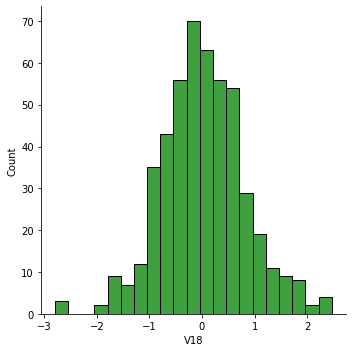

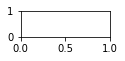

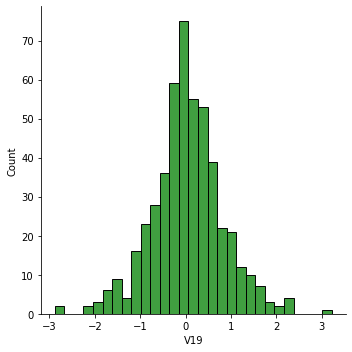

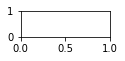

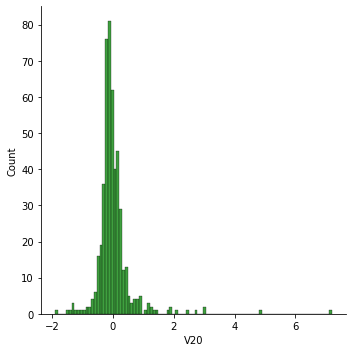

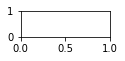

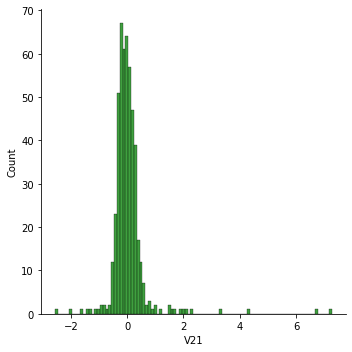

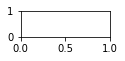

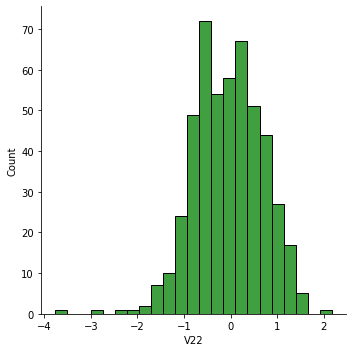

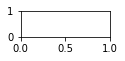

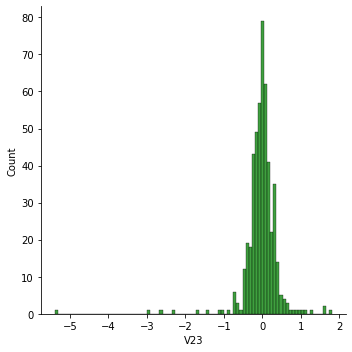

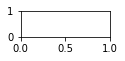

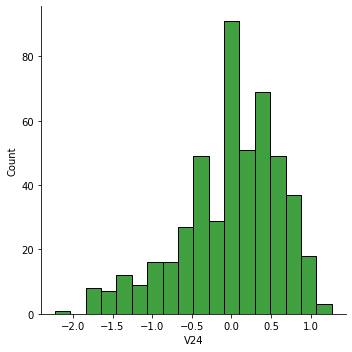

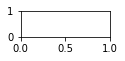

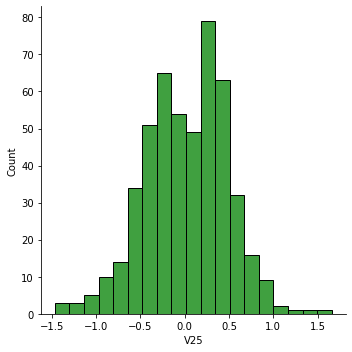

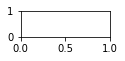

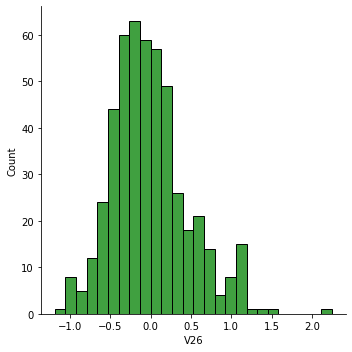

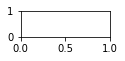

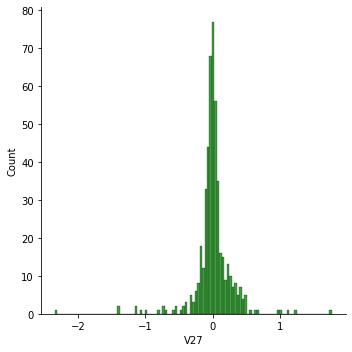

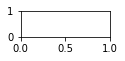

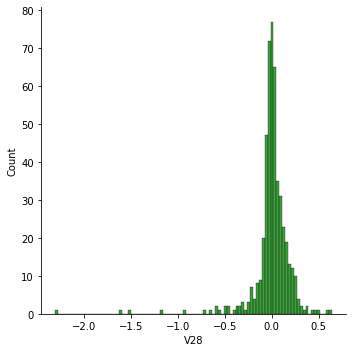

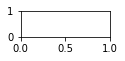

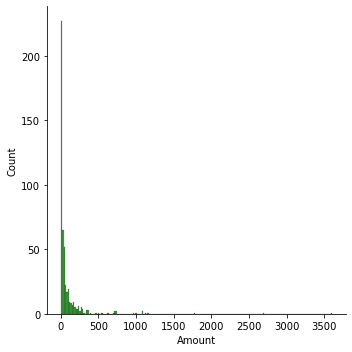

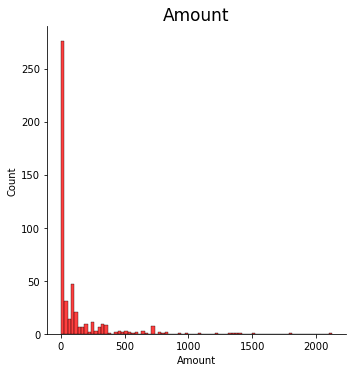

In [28]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = data.Class == 0
fraud_records = data.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.displot(X[col][normal_records], color='green')
  sns.displot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

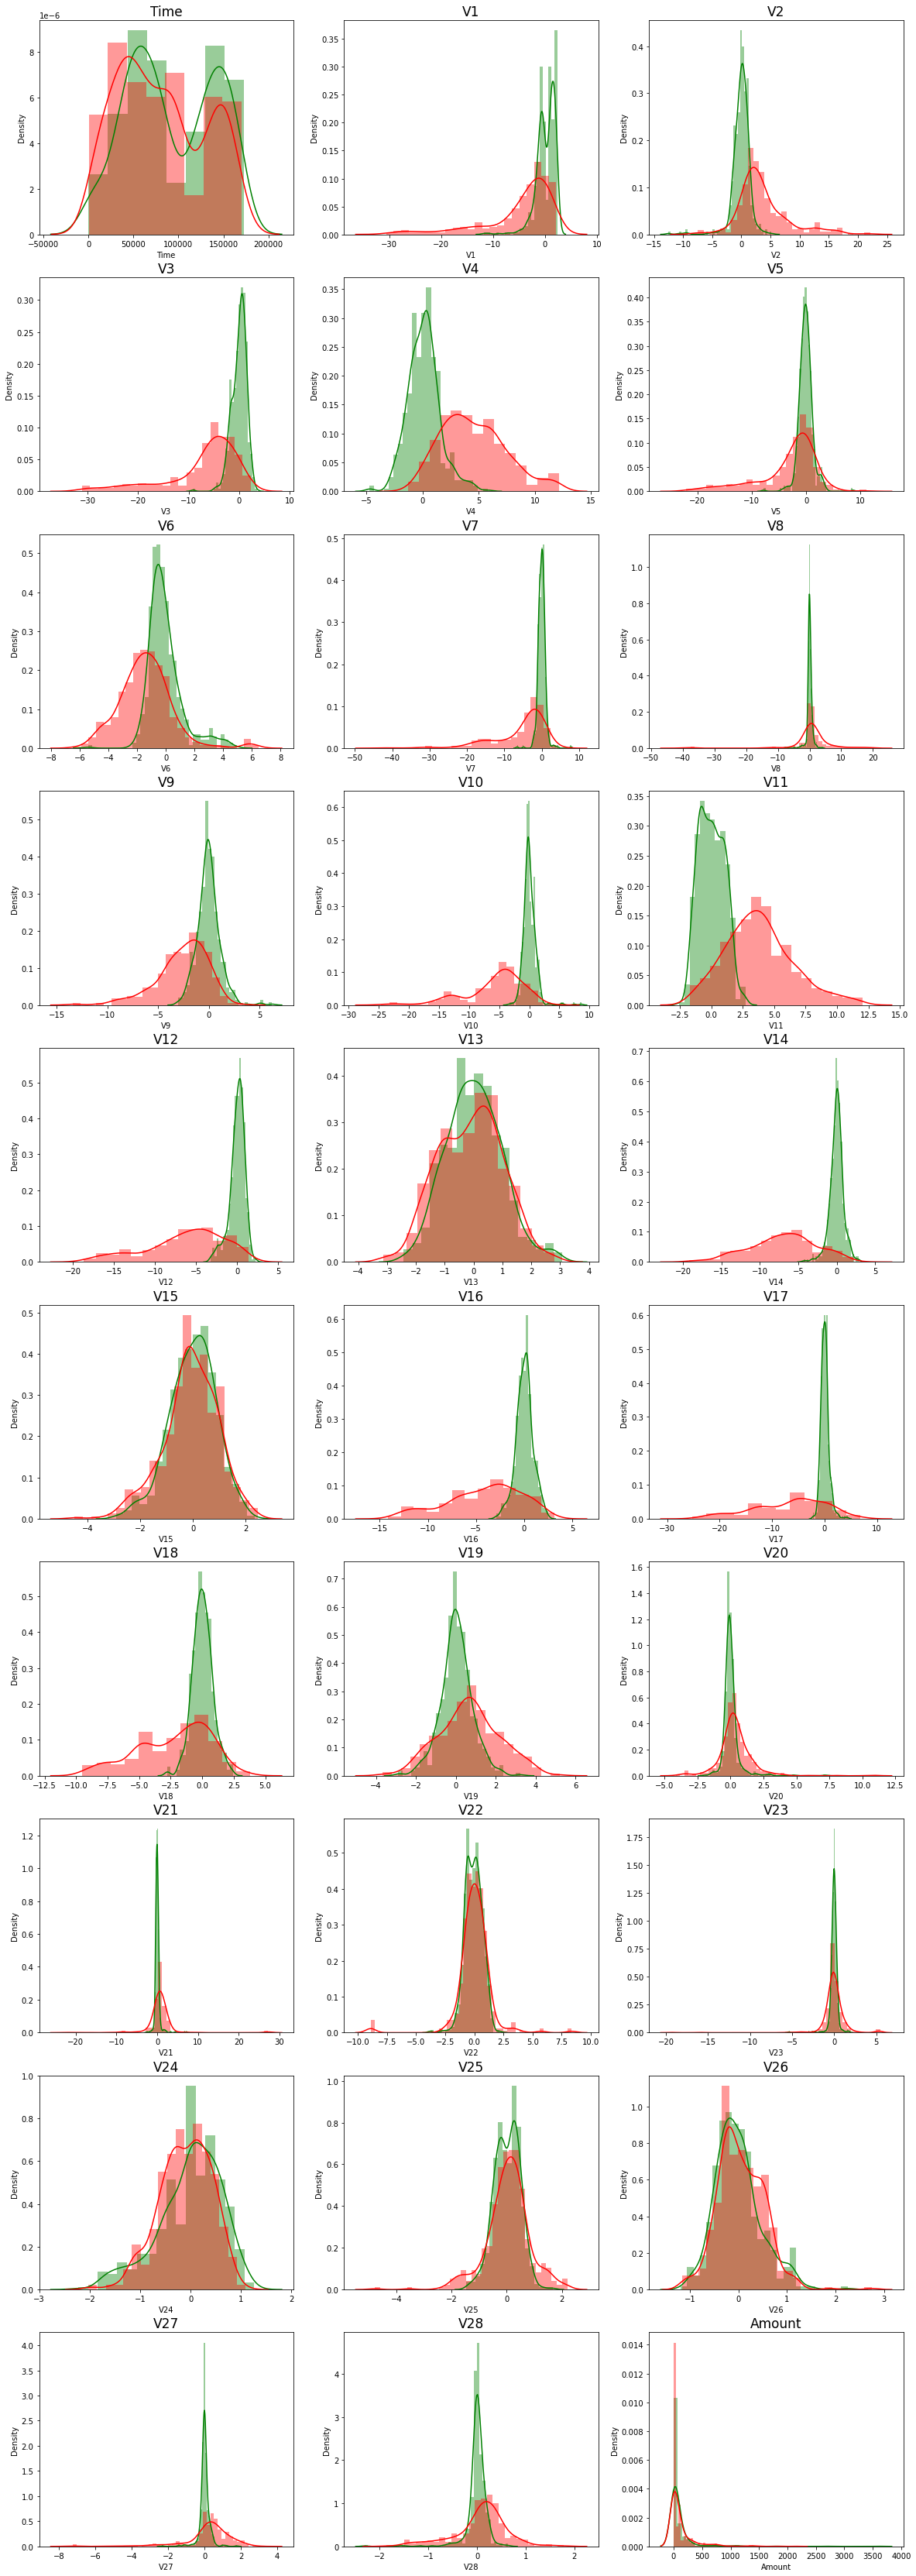

In [29]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = data.Class == 0
fraud_records = data.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Split the data into Training data & Testing Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

splitting x and y into train and test data randomly. testsize allows to split test-train in 80:20,stratified based on Y even distribution occurs and random state 2 refers to return as it is

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

In [32]:
model = LogisticRegression()

In [33]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [34]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9161372299872935


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9035532994923858


accuracy score is amost similar for test and train data ,so logistic regression is best fit model without any overfitting and underfitting

In [39]:
y_pred=model.predict(X_test)

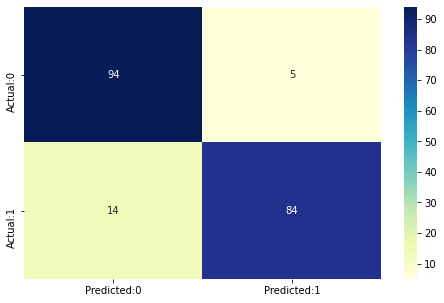

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");